<a href="https://colab.research.google.com/github/a7me3D/Bayesian-Network-with-python/blob/main/bayesian_network_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let consider a BN with the following variables :


Exam Level (e)


IQ Level (i)


Aptitude Score (s)


Marks (m)


Admission (a)

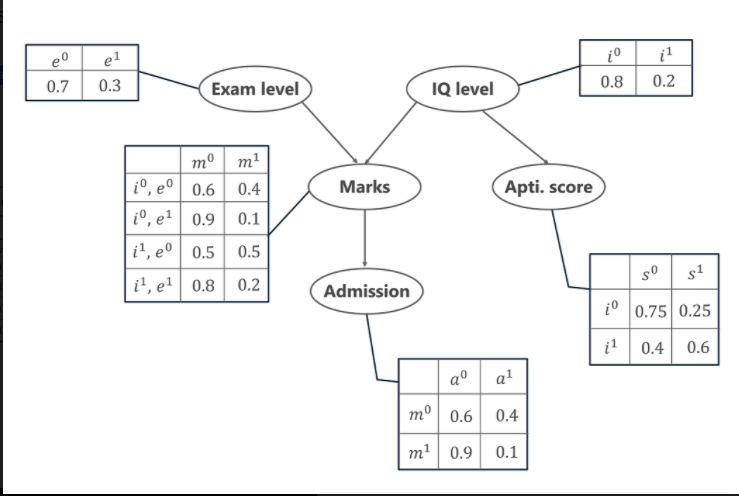

In [ ]:
!pip install pgmpy &> /dev/null

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
BN = BayesianNetwork([('e','m'),('i','m'),('m','a'),('i','s')])

In [ ]:
e = TabularCPD(variable='e',variable_card=2,values=[[0.7],[0.3]])

In [ ]:
i = TabularCPD(variable='i',variable_card=2,values=[[0.8],[0.2]])

In [ ]:
m = TabularCPD(variable='m',variable_card=2,evidence=['e','i'],evidence_card=[2,2],values=[[0.6,0.9,0.5,0.8],[0.4,0.1,0.5,0.2]])

In [ ]:
s = TabularCPD(variable='s',variable_card=2,evidence=['i'],evidence_card=[2],values=[[0.75,0.4],[0.25,0.6]])

In [ ]:
a = TabularCPD(variable='a',variable_card=2,evidence=['m'],evidence_card=[2],values=[[0.6,0.9],[0.4,0.1]])

In [ ]:
BN.add_cpds(e,i,m,s,a)

In [ ]:
BN.check_model()

True

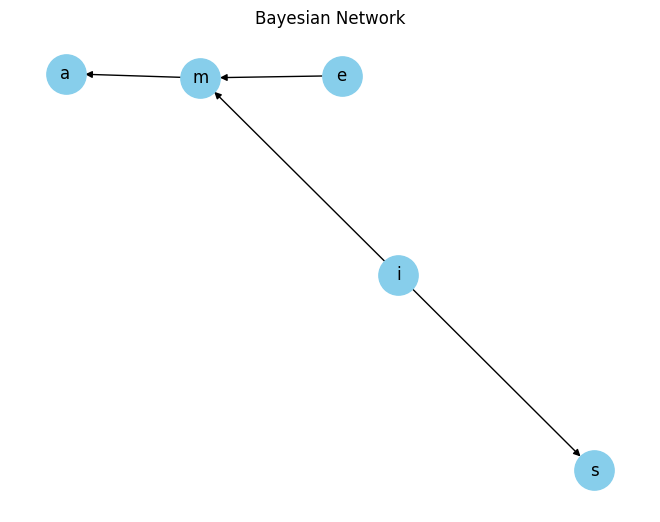

In [ ]:
gr = nx.DiGraph()
for node in BN.nodes() :
  gr.add_node(node)
for edge in BN.edges() :
  gr.add_edge(edge[0],edge[1])
p = nx.spring_layout(gr)
nx.draw(gr,p,with_labels=True,node_size=800,node_color='skyblue')
plt.title('Bayesian Network')
plt.show()

In [ ]:
from pgmpy.inference import VariableElimination,ApproxInference

In [ ]:
inf = VariableElimination(BN)

Case 1: Calculate the probability that in spite of the exam level being difficult, the student having a low IQ level and a low Aptitude Score, manages to pass the exam and secure admission to the university.

In [ ]:
var = inf.query(variables=['a'],evidence={'e':1,'i':0,'s':0})

In [ ]:
print(var)

+------+----------+
| a    |   phi(a) |
+======+==========+
| a(0) |   0.7500 |
+------+----------+
| a(1) |   0.2500 |
+------+----------+


Case 2: In another case, calculate the probability that the student has a High IQ level and Aptitude Score, the exam being easy yet fails to pass and does not secure admission to the university.


In [ ]:
var2 = inf.query(variables=['a'],evidence={'e':1,'i':1,'s':1})

In [ ]:
print(var2)

+------+----------+
| a    |   phi(a) |
+======+==========+
| a(0) |   0.6600 |
+------+----------+
| a(1) |   0.3400 |
+------+----------+
